<a href="https://colab.research.google.com/github/olesyamba/Risk_analysis/blob/main/Practice_task_VaR_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Условие:

Ежемесячные финансовые результаты компании за последние 3 года даны ниже (выполните код). Первое значение соответствует самому старому наблюдению, последнее -- самому новому.


In [ ]:
import numpy as np
np.random.seed(42)
res = np.random.randint(-7, 7, size=3 * 12) + np.cumsum(np.random.randint(-1, 1, size=3 * 12))
assert res[0] == -2, "Something's wrong! Please, contact the teacher!"
print(res)

[ -2  -6   2  -1  -4   1  -7  -5  -2 -10  -6  -2  -3  -6 -10 -11  -8  -8
 -13 -11 -13 -17 -12  -9  -8 -17 -22 -12 -19 -24 -13 -15 -19 -12 -14 -17]


Задача 1

Оцените VaR на уровне 95% на следующий месяц с использованием исторического метода, предполагая стационарность размеров убытков

In [ ]:
import pandas as pd

def calculate_VaR_HS(returns, level):
    return -returns.quantile(1 - level, interpolation='higher')

level = .95

calculate_VaR_HS(pd.Series(res), level)

19

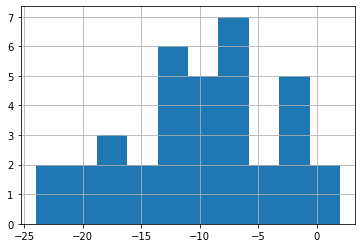

In [ ]:
pd.Series(res).hist()

Задачи 2 и 3

Параметрический метод с обобщённым распределением Парето, предполагая стационарность размеров убытков

In [ ]:
import scipy.stats as ss

# Парето P&L
params = ss.genpareto.fit(-res) # переношу данные об убытках в правый хвост
print("GenPareto: {:.2f} ".format(ss.genpareto.ppf(level, *params))) # квантиль распределения в правом хвосте

# Нормальность приращений P&L
# print(pd.Series(res).diff())
incr = pd.Series(res).diff().dropna()
params = ss.norm.fit(incr)
print("Normal: {:.2f} ".format( - (res[-1] + ss.norm.ppf(1 - level, *params))))
print(ss.norm.ppf(1 - level, *params))

GenPareto: 21.76 
Normal: 25.74 
-8.735007463158482


*Задачи* 4 и 5

In [ ]:
# Исходный ряд
rates = pd.Series([6.37,6.36,6.35,6.34,6.34,6.35,6.36,6.36,6.37,6.33,6.32,6.32,6.33,6.15,6.16,6.09,6.1,6.06,5.94,5.91,5.92,5.87,5.8,5.73,5.71,5.64,5.6,5.58,5.58,5.56,5.52,5.46,5.43,5.39,5.36,5.36,5.37,5.38,5.37,5.36,5.36,5.35,5.38,5.38,5.33,5.29,5.26,5.22,5.13,5.11,5.08,5.05,5,4.98,4.96,4.95,4.95,4.95,4.92,4.89,4.88,4.86,4.86,4.83,4.83,4.84,4.85,4.86,4.87,4.9,4.93,4.94,4.95,4.96,4.95,4.81,4.8,4.79,4.78,4.73,4.72,4.74,4.66,4.64,4.62,4.62,4.63,4.61,4.58,4.59,4.57,4.58,4.58,4.55,4.54,4.51,4.51,4.51,4.52,4.51,4.43,4.35,4.36,4.32,4.27,4.21,4.19,4.18,4.19,4.2,4.2,4.21,4.21,4.21,4.22,4.2,4.2,4.2,4.2,4.21,4.23,4.21,4.22,4.21,4.21,4.21,4.21,4.21,4.21,4.21,4.21,4.22,4.23,4.23,4.23,4.23,4.23,4.22,4.21,4.21,4.2,4.19,4.2,4.21,4.21,4.21,4.2,4.2,4.2,4.18,4.16,4.16,4.16,4.17,4.17,4.17,4.15,4.13,4.13,4.13,4.12,4.11,4.11,4.11,4.12,4.13,4.13,4.14,4.15,4.15,4.15,4.16,4.16,4.17,4.17,4.17,4.17,4.17,4.17,4.17,4.17,4.16,4.16,4.17,4.18,4.16,4.17,4.17,4.18,4.18,4.18,4.18,4.18,4.18,4.18,4.18,4.18,4.18,4.18,4.18,4.18,4.17,4.17,4.18,4.18,4.18,4.17,4.17,4.17,4.17,4.17,4.17,4.17,4.17,4.17,4.17,4.16,4.16,4.16,4.15,4.15,4.14,4.14,4.13,4.14,4.15,4.15,4.14,4.14,4.14,4.14,4.14,4.14,4.14,4.14,4.14,4.15,4.15,4.14,4.15,4.15,4.15,4.14,4.14,4.14,4.13,4.13,4.13,4.13,4.13,4.14,4.14,4.15,4.15,4.13,4.15,4.16,4.15,4.16,4.17,4.17,4.17,4.18,4.18,4.18,4.19,4.21,4.21,4.23,4.26,4.27,4.28,4.29,4.3,4.33,4.37,4.37,4.37,4.38,4.39,4.44,4.47,4.39,4.45,4.67,4.83,4.88,4.94,5.01,5.07,5.06,5.18,5.23,5.24,5.24,5.26,5.28,5.29,5.29,5.3,5.32,5.3,5.31,5.32,5.36,5.36,5.38,5.39,5.42,5.48,5.48,5.51,5.53,5.53,5.53,5.52,5.51,5.49,5.54,5.67,5.69,5.72,5.7,5.7,5.77,5.81,5.82,5.83,5.83,5.84,5.85,5.83,5.83,5.86,5.87,5.84,5.88,5.96,5.97,6.08,6.21,6.11,6.23,6.39,6.35,6.36,6.02,5.99,5.85,5.83,5.84,5.86,5.85,5.85,5.84,5.84,5.84,5.85,5.85,5.86,5.88,5.87,5.87,5.88,5.89,5.89,5.93,6.02,6.03,6.04,6.04,6.05,6.04,6.04,6.04,6.04,6.04,6.05,6.05,6.06,6.07,6.07,6.08,6.09,6.1,6.09,6.09,6.1,6.09])
last_rate = rates[0]
print("Последнее значение ставки ", last_rate)
rates = rates[: : -1]
print(rates)
rates.pct_change().dropna()

Последнее значение ставки  6.37
388    6.09
387    6.10
386    6.09
385    6.09
384    6.10
       ... 
4      6.34
3      6.34
2      6.35
1      6.36
0      6.37
Length: 389, dtype: float64


387    0.001642
386   -0.001639
385    0.000000
384    0.001642
383   -0.001639
         ...   
4     -0.001575
3      0.000000
2      0.001577
1      0.001575
0      0.001572
Length: 388, dtype: float64

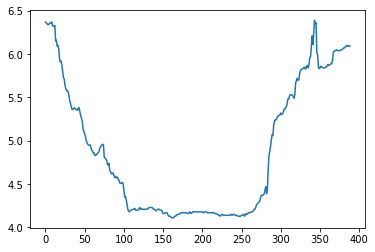

In [ ]:
rates.plot()

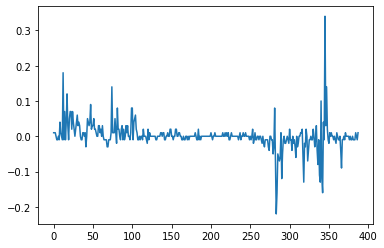

In [ ]:
r_diff = rates.diff().dropna()
r_diff.plot()

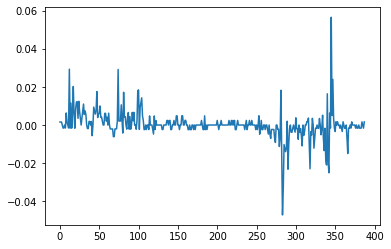

In [ ]:
r_ret = rates.pct_change().dropna()
r_ret.plot()

In [ ]:
level = .99

print("HS for IR: {:.2f} ".format(last_rate + calculate_VaR_HS(pd.Series(-r_diff), level) )) # просто 1-level подставить нельзя, т.к.это потребует изменения interpolatio в функции для VaR.
print("HS for IR: {:.2f} ".format(last_rate*(1 + calculate_VaR_HS(pd.Series(-r_ret), level) )))

params = ss.norm.fit(r_diff)
print("Norm for IR: {:.2f} ".format(last_rate + ss.norm.ppf(level, *params)))

HS for IR: 6.49 
HS for IR: 6.50 
Norm for IR: 6.46 
